In [18]:
import numpy as np
import matplotlib.pyplot as plt

#dinamica = "paralela"
dinamica = "secuencial"

%matplotlib inline

#### Entradas

In [19]:
N = 500 #Cantidad de neuronas (500, 1000, 2000, 4000)
alfa = 0.14 #(0.12, 0.14, 0.16, 0.18)
P = int(N*alfa) #Cantidad de patrones
print("Cantidad de patrones: " + str(P))

x = np.ones(shape=(P,N), dtype='int')

for i in range(P):
    for j in range(N):
        if(np.random.randint(0, 2) < 1):
            x[i][j] = -1

Cantidad de patrones: 70


#### Conexiones: regla de Hebb

In [20]:
w = np.zeros(shape=(N,N))

#Sumamos
for mu in range(P):
    w += np.outer(x[mu], x[mu])

#Normalizamos
w = w/N

#Eliminamos las "autoconexiones"
for i in range(N):
    w[i][i] = 0

#### Dinámica determinista
##### Paralela

In [21]:
if (dinamica=="paralela"):
    conv = 0 #Contador de veces que convergió
    per2 = 0 #Contador de veces que se quedó en ciclo de período 2

    for mu in range(P):
        s = np.zeros(N, dtype='int')
        s_prev = np.zeros(N, dtype='int')
        s_2prev = np.zeros(N, dtype='int')

        convergencia = False #bandera

        mu0 = np.random.randint(P)
        s_prev = np.copy(x[mu0])

        p = 0 #cantidad de pasos temporales
        p_max = 500 #por si falla el loop

        while(not convergencia):
            p += 1
            s = np.sign(np.dot(w, s_prev)).astype('int')
            
            if(np.array_equal(s, s_prev)):
                print("Convirgió en " + str(p) + " pasos temporales")
                convergencia = True
                conv += 1

            if(np.array_equal(s, s_2prev)):
                print("Llegó a un ciclo de período 2 en " + str(p-1) + " pasos temporales")
                convergencia = True
                per2 += 1

            if(p==p_max):
                print("Llegué al límite - " + str(p_max) + " pasos temporales")
                convergencia = True

            #Actualizo los estados previos
            s_2prev = np.copy(s_prev)
            s_prev = np.copy(s)

    print("Convirgió " + str(conv) + " veces")
    print("Se quedó en un ciclo de período 2 " + str(per2) + " veces")

#### Secuencial + cálculo de overlaps

In [22]:
if (dinamica=="secuencial"):
    overlaps = np.zeros(P)

    #Para caracterizar la convergencia de la red
    max = 0 #Máxima cantidad de pasos temporales para converger
    acum = 0 #Acumulo para después hacer el promedio

    for mu in range(P):
        s = np.zeros(N, dtype='int')

        convergencia = False #bandera

        s_inicial = np.copy(x[mu])
        s = np.copy(s_inicial)
        
        p = 0 #cantidad de pasos temporales
        p_max = 500

        while(not convergencia):
            p += 1

            #Guardo el estado antes de empezar a modificar las neuronas
            s_prev = np.copy(s)

            #Actualizo todas las neuronas, una a la vez
            for i in range(N):
                s[i] = np.sign(np.dot(w[i, :], s)).astype('int')


            if(np.array_equal(s, s_prev)):
                print("Convirgió en " + str(p) + " pasos temporales")
                convergencia = True
                acum += p
                if(p > max):
                    max = p

            if(p==p_max):
                print("Llegué al límite - " + str(p_max) + " pasos temporales")
                convergencia = True



        #Calculo el overlap
        overlaps[mu] = np.dot(s_inicial, s)/N

    print("Cantidad promedio de pasos temporales para converger: " + str(acum/P))
    print("Mayor cantidad de pasos temporales para converger: " + str(max))

Convirgió en 2 pasos temporales
Convirgió en 9 pasos temporales
Convirgió en 2 pasos temporales
Convirgió en 6 pasos temporales
Convirgió en 2 pasos temporales
Convirgió en 1 pasos temporales
Convirgió en 3 pasos temporales
Convirgió en 1 pasos temporales
Convirgió en 6 pasos temporales
Convirgió en 2 pasos temporales
Convirgió en 3 pasos temporales
Convirgió en 7 pasos temporales
Convirgió en 1 pasos temporales
Convirgió en 5 pasos temporales
Convirgió en 5 pasos temporales
Convirgió en 3 pasos temporales
Convirgió en 2 pasos temporales
Convirgió en 8 pasos temporales
Convirgió en 2 pasos temporales
Convirgió en 5 pasos temporales
Convirgió en 2 pasos temporales
Convirgió en 4 pasos temporales
Convirgió en 1 pasos temporales
Convirgió en 2 pasos temporales
Convirgió en 2 pasos temporales
Convirgió en 2 pasos temporales
Convirgió en 3 pasos temporales
Convirgió en 3 pasos temporales
Convirgió en 9 pasos temporales
Convirgió en 3 pasos temporales
Convirgió en 2 pasos temporales
Convirgi

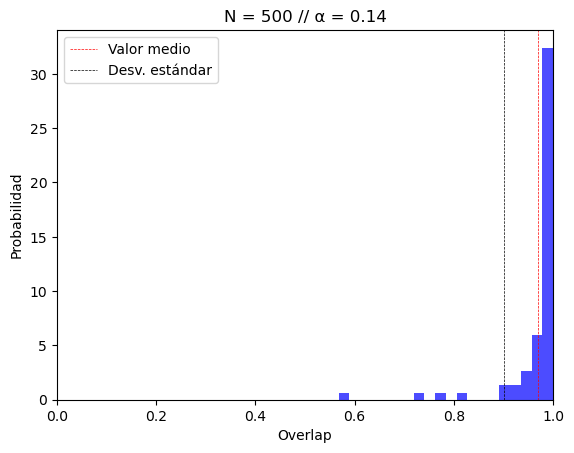

In [23]:
if (dinamica=="secuencial"):
    mean_overlap = np.mean(overlaps)
    std_deviation = np.std(overlaps)

    #Histograma normalizado + valor medio y desviación estándar
    plt.hist(overlaps, bins=20, color='blue', alpha=0.7, density=True)
    plt.axvline(mean_overlap, color='red', linestyle='dashed', linewidth=0.5, label='Valor medio')
    plt.axvline(mean_overlap + std_deviation, color='k', linestyle='dashed', linewidth=0.5, label='Desv. estándar')
    plt.axvline(mean_overlap - std_deviation, color='k', linestyle='dashed', linewidth=0.5)
    plt.legend()
    plt.title("N = " + str(N) + " // α = " + str(alfa))
    plt.xlim(0, 1)
    plt.xlabel('Overlap')
    plt.ylabel('Probabilidad')
    plt.savefig('Informe/1/histograma_'+str(N)+'_'+str(alfa)+'2.png')
    plt.show()

Guardo datos de overlap para analizar después

In [24]:
if (dinamica=="secuencial"):
    txt = "1-overlaps.txt"

    with open(txt, "a") as file:
        file.write(str(N) + " " + str(alfa) + " " + str(mean_overlap) + " " + str(std_deviation) + '\n')